In [22]:
from scipy.interpolate import lagrange
import numpy as np
from numpy import *
from numpy.linalg import inv, solve
import sys
import math
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt

x= np.array([0, 0.25, 0.50, 0.75, 1.0])
y= np.array([0, 1, 0, 0.25, 0])
dy= np.array([0, -0.5, -1, 1, 0])

def matrixinv(i):
    A = np.matrix(([1.0, x[i+1]-x[i], (x[i+1]-x[i])**2, (x[i+1]-x[i])**3], 
                  [0.0, 1.0, 2*(x[i+1]-x[i]), 3*(x[i+1]-x[i])**2], 
                  [0.0, 0.0, 2.0, 6*(x[i+1]-x[i])],
                  [1.0, 0 , 0 ,0]))
    print(inv(A))
    
def matrixinv2(i):
    A = np.matrix(([1.0, x[i+1]-x[i], (x[i+1]-x[i])**2, (x[i+1]-x[i])**3], 
                  [0.0, 1.0, 2*(x[i+1]-x[i]), 3*(x[i+1]-x[i])**2], 
                  [0.0, 0.0, 2.0, 6*(x[i+1]-x[i])],
                  [0.0, 12.0 , -2.0 ,0]))
    print(inv(A))

matrixinv(0)

[[  0.      0.      0.      1.   ]
 [ 12.     -2.      0.125 -12.   ]
 [-48.     12.     -1.     48.   ]
 [ 64.    -16.      2.    -64.   ]]


In [62]:
h = 0.25
h2 = 0.25**2
h3 = 0.25**3

A= np.array([[h,h3,0,0,0,0,0,0,0,0,0],
           [0,0,h,h2,h3,0,0,0,0,0,0],
           [0,0,0,0,0,h,h2,h3,0,0,0],
           [0,0,0,0,0,0,0,0,h,h2,h3],
           [1,3*h2,-1,0,0,0,0,0,0,0,0],
           [0,0,1,2*h,3*h2,-1,0,0,0,0,0],
           [0,0,0,0,0,1,2*h,3*h2,-1,0,0],
           [0,6*h,0,-2,0,0,0,0,0,0,0],
           [0,0,0,2,6*h,0,-2,0,0,0,0],
           [0,0,0,0,0,0,2,6*h,0,-2,0],
           [0,0,0,0,0,0,0,0,0,1,3*h]])
b = np.array([[1],[-1],[0.25],[-0.25],[0],[0],[0],[0],[0],[0],[0]])

z = solve(A,b)

print(z)


[[  6.53571429]
 [-40.57142857]
 [ -1.07142857]
 [-30.42857143]
 [ 74.85714286]
 [ -2.25      ]
 [ 25.71428571]
 [-50.85714286]
 [  1.07142857]
 [-12.42857143]
 [ 16.57142857]]


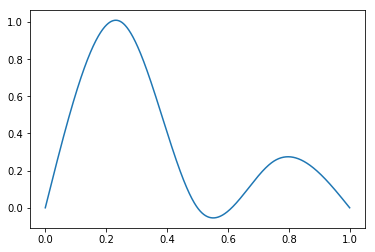

In [49]:
import matplotlib.pyplot as plt

def fun (t): 
    if x[0] <= t <= x[1]:
        return z.item(0)*t + z.item(1)*t**3
    elif x[1] <= t <= x[2]:
        return 1+z.item(2)*(t-0.25)+z.item(3)*(t-0.25)**2+z.item(4)*(t-0.25)**3
    elif x[2] <= t <= x[3]:
        return z.item(5)*(t-0.5)+z.item(6)*(t-0.5)**2+z.item(7)*(t-0.5)**3
    elif x[3] <= t <= x[4]:
        return 0.25+z.item(8)*(t-0.75)+z.item(9)*(t-0.75)**2+z.item(10)*(t-0.75)**3

vfun = np.vectorize(fun)

t = np.linspace(0, 1, 1000)    
y = vfun(t)

plt.plot(t, y, '-')
plt.show()

In [60]:
A1= np.array([[h2,h3,0,0,0,0,0,0,0,0,0],
           [0,0,h,h2,h3,0,0,0,0,0,0],
           [0,0,0,0,0,h,h2,h3,0,0,0],
           [0,0,0,0,0,0,0,0,h,h2,h3],
           [2*h,3*h2,-1,0,0,0,0,0,0,0,0],
           [0,0,1,2*h,3*h2,-1,0,0,0,0,0],
           [0,0,0,0,0,1,2*h,3*h2,-1,0,0],
           [2,6*h,0,-2,0,0,0,0,0,0,0],
           [0,0,0,2,6*h,0,-2,0,0,0,0],
           [0,0,0,0,0,0,2,6*h,0,-2,0],
           [0,0,0,0,0,0,0,0,1,2*h,3*h2]])
b1 = np.array([[1],[-1],[0.25],[-0.25],[0],[0],[0],[0],[0],[0],[0]])

z1 = solve(A1,b1)

print(z1)


[[  45.42857143]
 [-117.71428571]
 [   0.64285714]
 [ -42.85714286]
 [  97.14285714]
 [  -2.57142857]
 [  30.        ]
 [ -62.85714286]
 [   0.64285714]
 [ -17.14285714]
 [  42.28571429]]


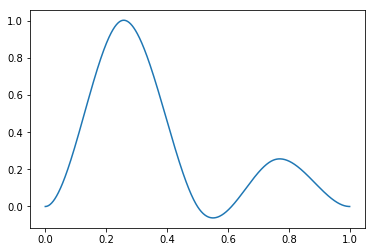

In [61]:
def fun (t): 
    if x[0] <= t <= x[1]:
        return z1.item(0)*t**2 + z1.item(1)*t**3
    elif x[1] <= t <= x[2]:
        return 1+z1.item(2)*(t-0.25)+z1.item(3)*(t-0.25)**2+z1.item(4)*(t-0.25)**3
    elif x[2] <= t <= x[3]:
        return z1.item(5)*(t-0.5)+z1.item(6)*(t-0.5)**2+z1.item(7)*(t-0.5)**3
    elif x[3] <= t <= x[4]:
        return 0.25+z1.item(8)*(t-0.75)+z1.item(9)*(t-0.75)**2+z1.item(10)*(t-0.75)**3

vfun = np.vectorize(fun)

t = np.linspace(0, 1, 1000)    
y = vfun(t)

plt.plot(t, y, '-')
plt.show()